<IPython.core.display.Javascript object>


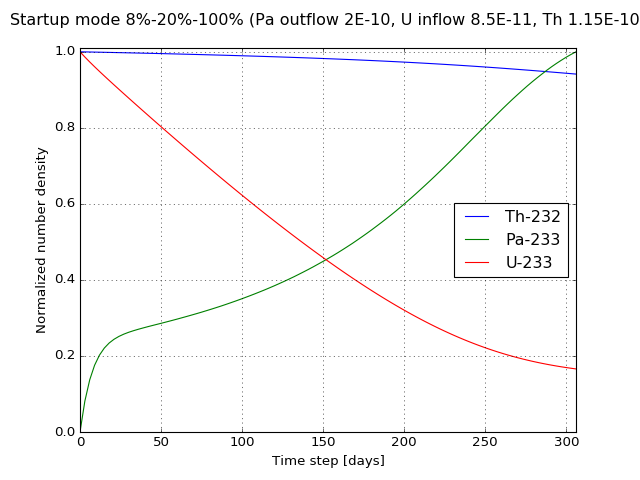

<IPython.core.display.Javascript object>


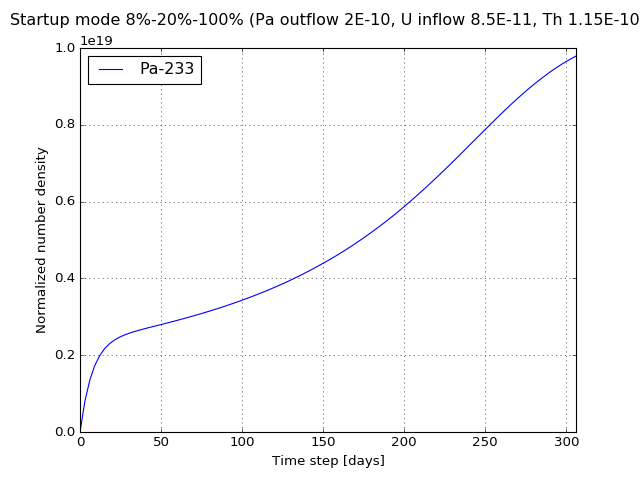

<IPython.core.display.Javascript object>


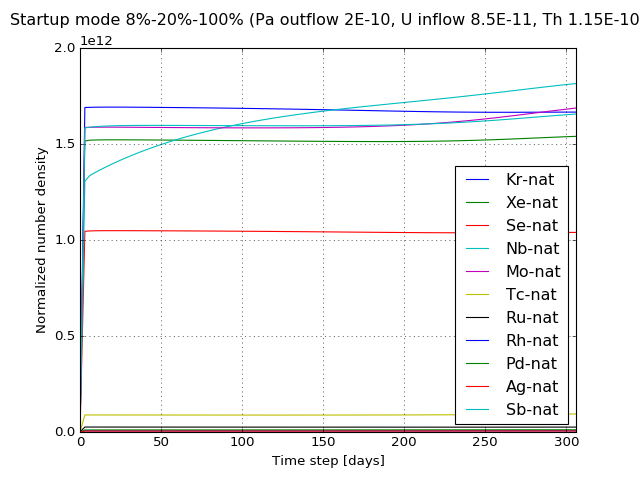

<IPython.core.display.Javascript object>


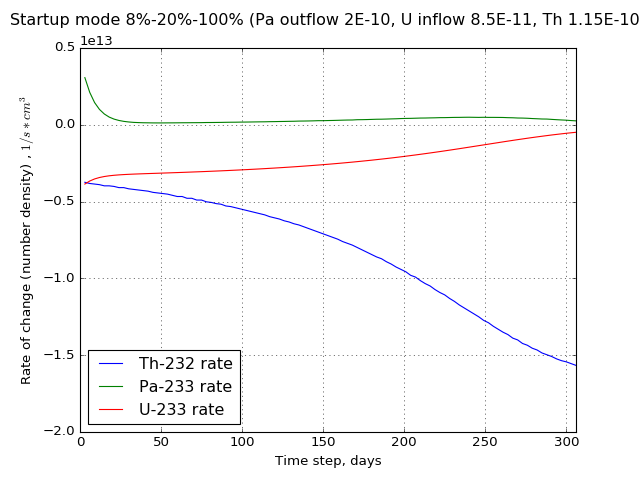

<IPython.core.display.Javascript object>


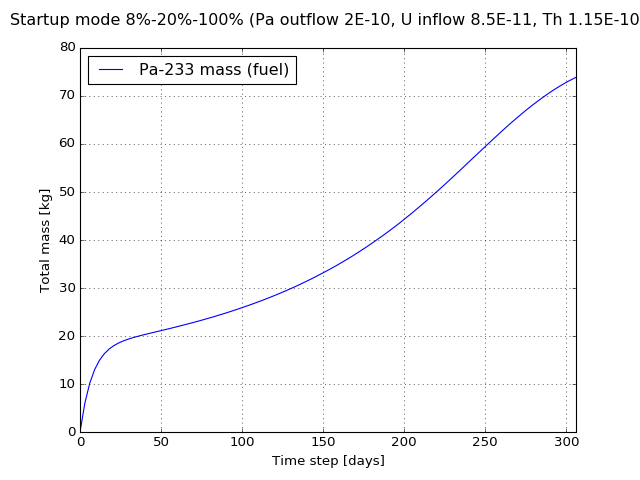

<IPython.core.display.Javascript object>


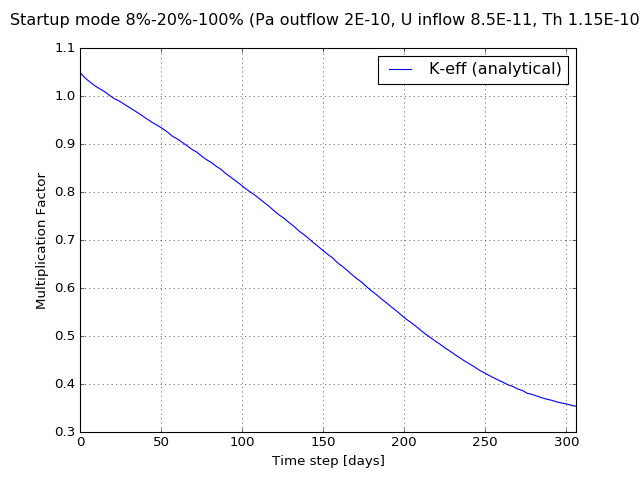

In [20]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

dep = serpent.parse_dep('/home/andrei2/Desktop/git/msr-neutronics/depletion/tank_for_Pa/only_two_flows/core_dep.m', make_mats=False)
res = serpent.parse_res('/home/andrei2/Desktop/git/msr-neutronics/depletion/tank_for_Pa/only_two_flows/core_res.m')
#res2 = serpent.parse_res('/home/andrei2/Desktop/git/msr-neutronics/depletion/online_1200days_Pa_less_Th/less_Th_rate/core_res.m')
#print list(dep.keys())
#print keff_a
#print (dep['NAMES'])
#print refill_density[17,:]
#print Th232_rate*(1e+24)

plot_title = 'Startup mode 8%-20%-100% (Pa outflow 2E-10, U inflow 8.5E-11, Th 1.15E-10)\n'
days = dep['DAYS']                        # Time array parsed from *_dep.m file
time_step = np.diff(days)                 # Depletion time step evaluation
names = dep['ZAI']                        # Names of isotopes parsed from *_dep.m file
keff_analytical = res['ANA_KEFF']         # K-eff parsing from dictionary
#keff_analytical2 = res2['ANA_KEFF']
kinf_dict = res['ABS_KINF']               # K-inf parsing from dictionary
#kinf_dict2 = res2['ABS_KINF']
bu = res['BURNUP']                        # Burnup parsing from dictionary
keff_a = keff_analytical[:,0]
kinf = kinf_dict[:,0]
burnup = bu[:,0]
EOC = np.amax(days)                       # End of cycle (simulation time length)
#total_mass_list = dep['TOT_MASS']
adens_fuel = dep['MAT_fuel_ADENS']        # atomic density for each isotope in material 'fuel'
mdens_fuel = dep['MAT_fuel_MDENS']        # mass density for each isotope in material 'fuel'
vol_fuel = dep['MAT_fuel_VOLUME']         # total volume of material 'fuel'

total_m = mdens_fuel[names.size-1,:]      # parce TOTAL mass density (sum of all isotopes atomic density)
xenon_m = mdens_fuel[13,:]                # parce Xe mass density
pa_m = mdens_fuel[3,:]                   # parce Pa-233 mass density

fuel_mass = total_m*vol_fuel              # Calculate total fuel mass
xe_mass = xenon_m*vol_fuel
pa_mass = pa_m*vol_fuel

#refill_density = dep['MAT_refill_MDENS']
#refill_mass = refill_density[17,:] * dep['MAT_refill_VOLUME']

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
ax.set_ylim(0,1.01)
for i in [0, 3, 6]:
    ax.plot(days, adens_fuel[i,:]/np.amax(adens_fuel[i,:]), '-', label=nucname.serpent(names[i]))
ax.legend(loc=0)
ax.set_ylabel('Normalized number density')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
fig_1.show()
#fig_1.savefig('tank_for_Pa/only_two_flows/startup_Th=1.15E-10U=8.5E-11Pa=2.0E-10/U_and_Pa_evolution_outflow.png')

# Initialize figure
fig_2 = matplotlib.pyplot.figure(2)
ax = fig_2.add_subplot(111)
ax.grid(True)
for i in [3]:
    ax.plot(days, (1e+24)*adens_fuel[i,:], '-', label=nucname.serpent(names[i]))
    #/np.amax(adens_fuel[i,:])
ax.legend(loc=0)
ax.set_ylabel('Normalized number density')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
fig_2.show()
#fig_2.savefig('tank_for_Pa/only_two_flows/startup_Th=1.15E-10U=8.5E-11Pa=2.0E-10/Pa_adens_evolution_outflow.png')

# Initialize figure
fig_p = matplotlib.pyplot.figure(3)
ax = fig_p.add_subplot(111)
ax.grid(True)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
for i in range(11,22):
    ax.plot(days, (1e+24)*adens_fuel[i,:], '-', label=nucname.serpent(names[i]))
#/np.amax(adens_fuel[i,:])
ax.legend(loc=0)
ax.set_ylabel('Normalized number density')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
#ax.set_ylim([0,1.1])
fig_p.show()
#fig_p.savefig('tank_for_Pa/only_two_flows/startup_Th=1.15E-10U=8.5E-11Pa=2.0E-10/nobel_fuel.png')

# Initialize figure
fig_ng = matplotlib.pyplot.figure(4)
ax = fig_ng.add_subplot(111)
ax.grid(True)
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
for i in [0, 3, 6]:
    ax.plot(days[1:], (1e+24*np.diff(adens_fuel[i,:])) / (time_step[0]*3600*24), '-', label=nucname.serpent(names[i])+' rate')
ax.legend(loc=0)
ax.set_ylabel('Rate of change (number density) , $1/s*cm^3$')
#ax.set_ylabel('Number density) , $10^{24}/cm^3$')
ax.set_xlabel('Time step, days')
ax.set_title(plot_title)
ax.set_xlim([0,EOC])
fig_ng.show()
#fig_ng.savefig('tank_for_Pa/only_two_flows/startup_Th=1.15E-10U=8.5E-11Pa=2.0E-10/rate_of_change_fuel.png')
# Initialize figure
fig_pa = matplotlib.pyplot.figure(5)
ax = fig_pa.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#ax.plot(days, xe_mass, '-', label='Xenon mass (fuel)')
ax.plot(days, pa_mass/1000, '-', label='Pa-233 mass (fuel)')
ax.legend(loc=0)
ax.set_ylabel('Total mass [kg]')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
#ax.set_title('Multiplication factor for different online reprocessing cases\n')
ax.set_xlim([0,EOC])
fig_keff.show()
# Initialize figure
fig_keff = matplotlib.pyplot.figure(6)
ax = fig_keff.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.plot(days, keff_a, '-', label='K-eff (analytical)')
#ax.plot(days, kinf, '-', label='K-inf')
#ax.plot(days, fuel_mass/np.amax(fuel_mass), '-', label='Total mass (fuel)')
#ax.plot(days, xe_mass, '-', label='Xenon mass (fuel)')
#ax.plot(days, pa_mass, '-', label='Pa-233 mass (fuel)')
#ax.plot(days, burnup, '-', label='Burnup (MWd/kgU)')
ax.legend(loc=0)
ax.set_ylabel('Multiplication Factor')
#ax.set_ylabel('Burnup (MWd/kgU)')
#ax.set_ylabel('Total mass [g]')
ax.set_xlabel('Time step [days]')
ax.set_title(plot_title)
#ax.set_title('Multiplication factor for different online reprocessing cases\n')
ax.set_xlim([0,EOC])
#ax.set_ylim([0,70000000])
fig_keff.show()
#fig_keff.savefig('tank_for_Pa/only_two_flows/startup_Th=1.15E-10U=8.5E-11Pa=2.0E-10/keff.png')